# Banking Business Case

In [2]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

C:\Users\HP\Documents\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Exploratory Data Analysis(EDA)

In [3]:
df1=pd.read_excel('Banking Case - Data.xlsx',sheet_name =0)

In [4]:
df2=pd.read_excel('Banking Case - Data.xlsx',sheet_name =1)

In [5]:
df3=pd.read_excel('Banking Case - Data.xlsx',sheet_name =2)

In [6]:
df2.isnull().sum()# To check null values in df2

Sno                  0
Customer_number      0
Insurance            0
balance             55
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
dtype: int64

In [7]:
df3.isnull().sum()# To check null values in df3

Customer_number     0
age                 0
job                13
marital            18
education          21
Annual Income      17
Gender              0
dtype: int64

# Handling missing values 

There are two approach to deal with null values .
1) Dropping all null values 
2) Imputation of values according to the data for example we can use mean , median and mode .
   mean imputation = if the data is following normal distribution we can compute mean.
   median imputation = if there are some extreme values (outlier) in data we can go with median.
   mode imputation = Basically used for categorical data .
#But in this dataset the null values are less than 2% of the data so we can drop null values because there will be minimal loss of information.

In [8]:
df2_new = df2.dropna()

In [9]:
df3_new = df3.dropna()

In [10]:
#merging dataset based on customer number using inner join and droping sno.
merged_df = pd.merge(df2_new, df3_new, on='Customer_number', how='inner').drop(columns=['Sno'])

In [11]:
merged_df.columns# target variable(dependent feature) =Term Deposit , rest all are independent feature 

Index(['Customer_number', 'Insurance', 'balance', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'last_contact_day', 'previous', 'poutcome',
       'Term Deposit', 'Count_Txn', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender'],
      dtype='object')

In [12]:
merged_df.shape #checking shape of data df2 

(44982, 19)

In [17]:
merged_df.describe()#this is the basic information about numeric data in the data frame 

,Customer_number,duration,campaign,last_contact_day,previous,Count_Txn,age
count,44982.000000,44982.000000,44982.000000,44982.000000,44982.000000,44982.000000,44982.000000
mean,23667.314526,258.142035,2.759659,41.994598,0.582344,299.629052,40.971211
std,13026.075580,257.636731,3.083343,99.628436,2.307927,115.604576,10.828637
min,1002.000000,-167.000000,0.000000,-7.000000,0.000000,-423.000000,18.000000
25%,12399.250000,103.000000,1.000000,1.000000,0.000000,200.000000,33.000000
50%,23692.500000,180.000000,2.000000,1.000000,0.000000,300.000000,39.000000
75%,34942.750000,319.000000,3.000000,1.000000,0.000000,399.000000,48.000000
max,46211.000000,4918.000000,63.000000,871.000000,275.000000,499.000000,121.000000


# Data Analysis & Visualization:

Answer-1)
  Income Insights:
•	How many customers have no annual income? Plot and present the data distribution of these customers


In [18]:
#step-01=Number of customers having no income.
customers_no_income = merged_df[merged_df['Annual Income'] == 0]
num_customers_no_income = len(customers_no_income)
print(f"Number of customers with no annual income: {num_customers_no_income}")

Number of customers with no annual income: 0


Answer-2) Loan-less Customers Profile:
•	Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?


In [19]:
loanless_customer=(merged_df['loan'] == 'no').sum()

In [20]:
loanless_customer # There are 37778 customers having no loan profile .
# The nnumber of customer having loan =7204.

37778

Note--From this observation we can say that our data is imbalance so before making model we have to deal with this using 
SMOTE(Synthetic Minority Over-sampling Technique).

In [21]:
merged_df.columns

Index(['Customer_number', 'Insurance', 'balance', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'last_contact_day', 'previous', 'poutcome',
       'Term Deposit', 'Count_Txn', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender'],
      dtype='object')

In [22]:
loan_categories = merged_df['loan'].value_counts()

print("Categories in Loan column:")
print(loan_categories)


Categories in Loan column:
loan
no     37778
yes     7204
Name: count, dtype: int64


In [23]:
loan_categories_unique = merged_df['loan'].unique()

print("Unique categories in Loan column:")
print(loan_categories_unique)


Unique categories in Loan column:
['no' 'yes']


In [24]:
merged_df

,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858,M
1,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754,F
2,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322,M
3,1006,no,231,yes,no,unknown,139.0,1,2,0,unknown,no,490.0,35,management,married,ter tiary,3960603,M
4,1007,no,447,yes,yes,unknown,217.0,1,2,0,unknown,no,411.0,28,management,single,ter tiary,2383284,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44977,46207,no,825,no,no,cellular,0.0,0,-1,0,unknown,yes,152.0,51,technician,married,tertiary,2229818,M
44978,46208,no,1729,no,no,cellular,0.0,0,-1,0,unknown,yes,334.0,121,retired,divorced,primary,2783556,M
44979,46209,no,5715,no,no,cellular,1127.0,5,184,3,success,yes,381.0,72,retired,married,secondary,443512,M
44980,46210,no,668,no,no,telephone,0.0,0,-1,0,unknown,no,211.0,57,blue-collar,married,secondary,4193684,F


In [25]:
# Assuming 'Loan' column contains 'yes' and 'no' values
# Separate the DataFrame into two based on the categories in the 'Loan' column
loan_yes_df = merged_df[merged_df['loan'] == 'yes']
loan_no_df = merged_df[merged_df['loan'] == 'no']


In [26]:
loan_yes_df.shape

(7204, 19)

In [27]:
loan_no_df.shape

(37778, 19)

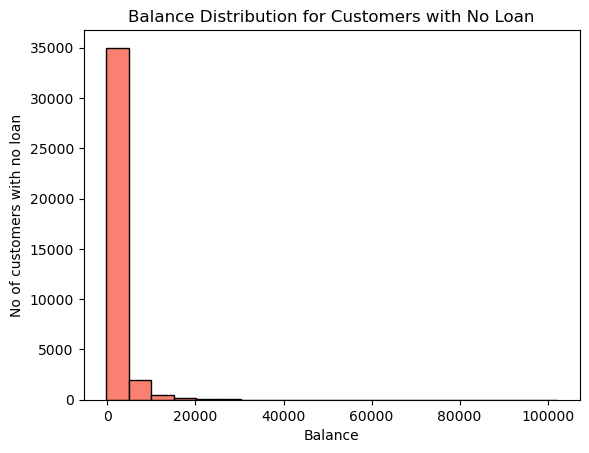

In [28]:
# Convert 'balance' column to numeric type, handling non-numeric values
loan_no_df['balance'] = pd.to_numeric(loan_no_df['balance'], errors='coerce')

# Plot the distribution of 'balance' for customers with no loan
plt.hist(loan_no_df['balance'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Balance Distribution for Customers with No Loan')
plt.xlabel('Balance')
plt.ylabel('No of customers with no loan')
plt.show()


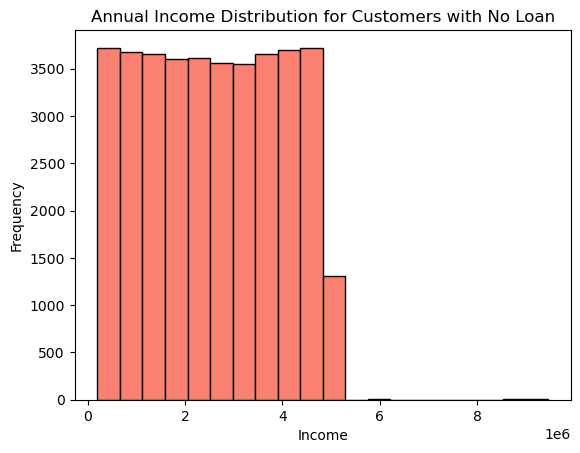

In [29]:
# Convert 'income' column to numeric type, handling non-numeric values
loan_no_df['Annual Income'] = pd.to_numeric(loan_no_df['Annual Income'], errors='coerce')

# Plot the distribution of 'income' for customers with no loan
plt.hist(loan_no_df['Annual Income'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Annual Income Distribution for Customers with No Loan')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


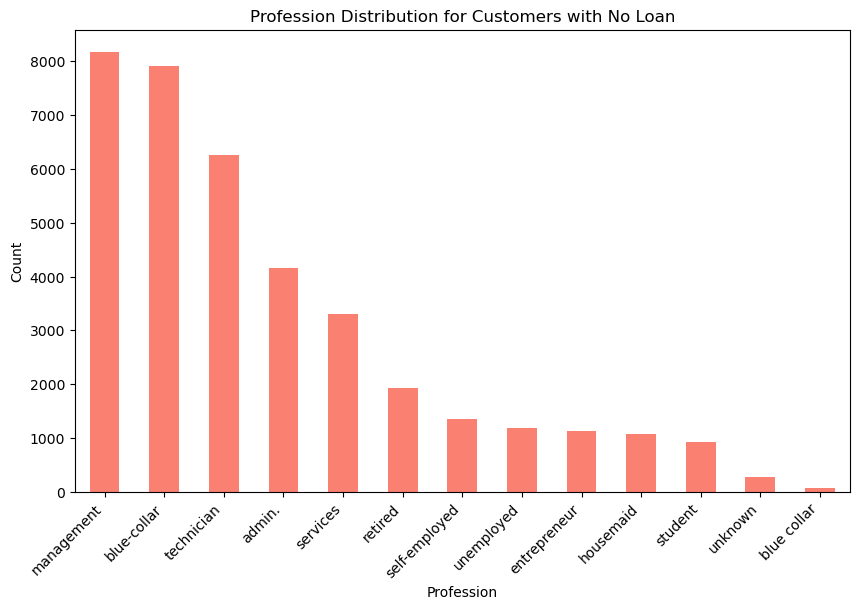

In [30]:
import matplotlib.pyplot as plt

# Plot the distribution of 'profession' for customers with no loan
plt.figure(figsize=(10, 6))
loan_no_df['job'].value_counts().plot(kind='bar', color='salmon')
plt.title('Profession Distribution for Customers with No Loan')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Answer-3) Loan and Insurance Analysis:
•Calculate the percentage of customers with a loan who have taken out insurance. Visualize this data and discuss potential implications.


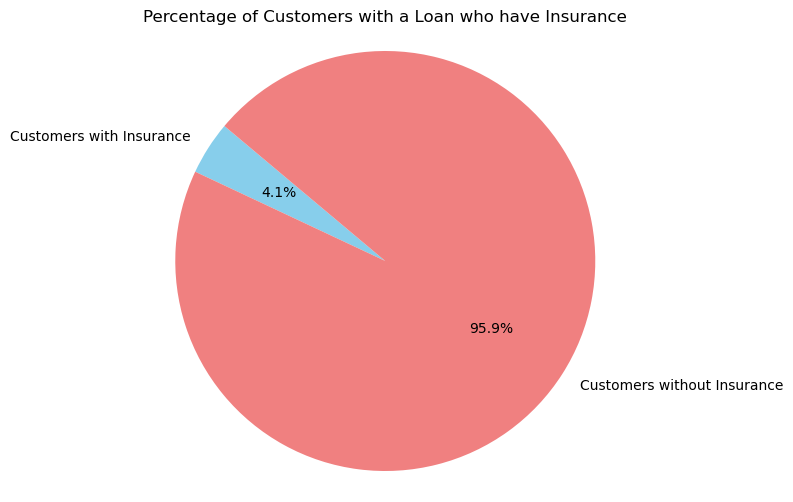

The percentage of customers with a loan who have taken out insurance is: 4.12%


In [31]:


# Step 1: Filter Data
loan_customers_df = merged_df[merged_df['loan'] != 'no']

# Step 2: Calculate Percentage
customers_with_insurance = loan_customers_df[loan_customers_df['Insurance'] == 'yes']
percentage_insurance = (len(customers_with_insurance) / len(loan_customers_df)) * 100

# Step 3: Visualize Data
labels = ['Customers with Insurance', 'Customers without Insurance']
sizes = [len(customers_with_insurance), len(loan_customers_df) - len(customers_with_insurance)]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Customers with a Loan who have Insurance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Step 4: Discuss Implications
print(f"The percentage of customers with a loan who have taken out insurance is: {percentage_insurance:.2f}%")

Answer-4) Communication Strategy Insights:
•	Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.


In [32]:
# Step 1: Map string values to numerical values
merged_df['Term Deposit'] = merged_df['Term Deposit'].map({'yes': 1, 'no': 0})

# Step 2: Calculate conversion rate for each contact method
conversion_rate = merged_df.groupby('contact')['Term Deposit'].mean() * 100

# Step 3: Identify contact method with highest conversion rate
best_contact_method = conversion_rate.idxmax()
highest_conversion_rate = conversion_rate.max()

# Step 4: Summarize insights
print(f"The best contact method for ascertaining the status of term deposit subscriptions is {best_contact_method} with a conversion rate of {highest_conversion_rate:.2f}%.")


The best contact method for ascertaining the status of term deposit subscriptions is Tel with a conversion rate of 55.56%.


Answer-5) Age and Home Loans:
•	Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.


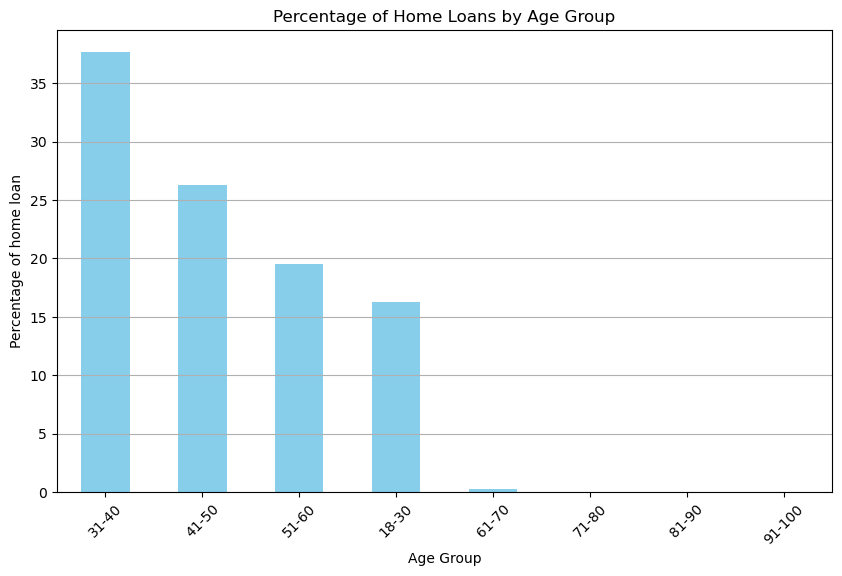

Percentage of Home Loans by Age Group:
age_group
31-40     37.673515
41-50     26.249306
51-60     19.544697
18-30     16.254858
61-70      0.235980
71-80      0.027762
81-90      0.000000
91-100     0.000000
Name: count, dtype: float64


In [33]:
# Step 1: Prepare Data
home_loan_df = merged_df[merged_df['loan'] == 'yes']

# Define age groups (you may need to adjust these based on your data)
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Add a new column for age groups
home_loan_df['age_group'] = pd.cut(home_loan_df['age'], bins=bins, labels=labels)

# Step 2: Calculate Percentage
percentage_by_age_group = (home_loan_df['age_group'].value_counts() / len(home_loan_df)) * 100

# Step 3: Visualize Data
plt.figure(figsize=(10, 6))
percentage_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of home loan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Step 4: Discuss Insights
print("Percentage of Home Loans by Age Group:")
print(percentage_by_age_group)

Answer-6) Income and Age Relationship:
•	Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.


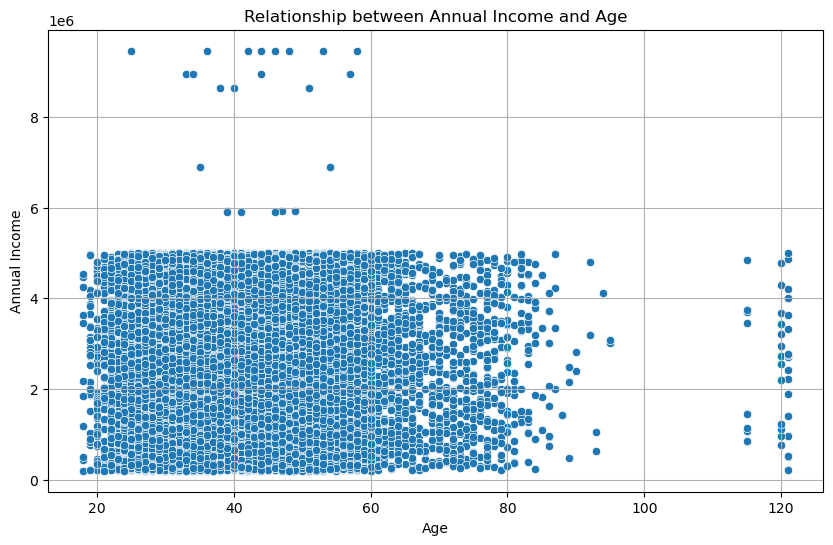

Correlation Coefficient between Annual Income and Age: 0.0011923693772973396


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Annual Income' and 'age' columns to numeric type, handling non-numeric values
merged_df['Annual Income'] = pd.to_numeric(merged_df['Annual Income'], errors='coerce')
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')

# Plot Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Annual Income', data=merged_df)
plt.title('Relationship between Annual Income and Age')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

# Calculate Correlation Coefficient
correlation_coefficient = merged_df['Annual Income'].corr(merged_df['age'])
print("Correlation Coefficient between Annual Income and Age:", correlation_coefficient)


from above sctter plot we can infer that there is very weak positive correlation between age and annual income.

# Modeling:

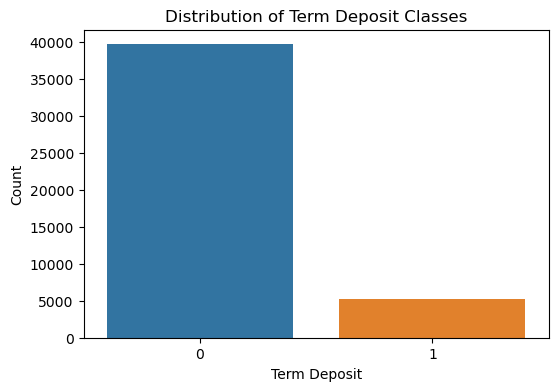

Class Counts:
Term Deposit
0    39683
1     5272
Name: count, dtype: int64


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the 'Term Deposit' column
class_counts = merged_df['Term Deposit'].value_counts()

# Plot the distribution of target classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Term Deposit', data=merged_df)
plt.xlabel('Term Deposit')
plt.ylabel('Count')
plt.title('Distribution of Term Deposit Classes')
plt.show()

print("Class Counts:")
print(class_counts)


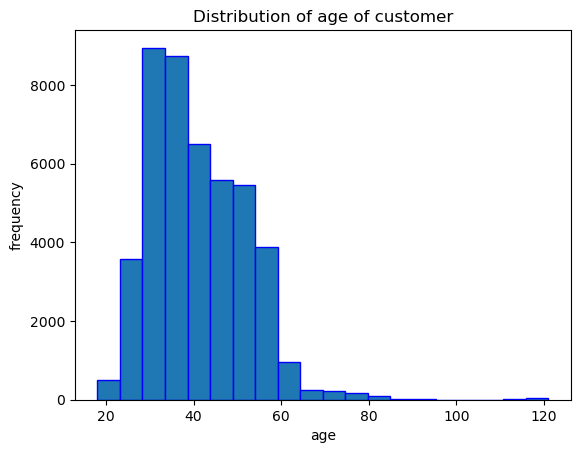

In [35]:
plt.hist(merged_df['age'],bins=20,edgecolor='Blue')
plt.title('Distribution of age of customer')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()
#there is normally distributed 

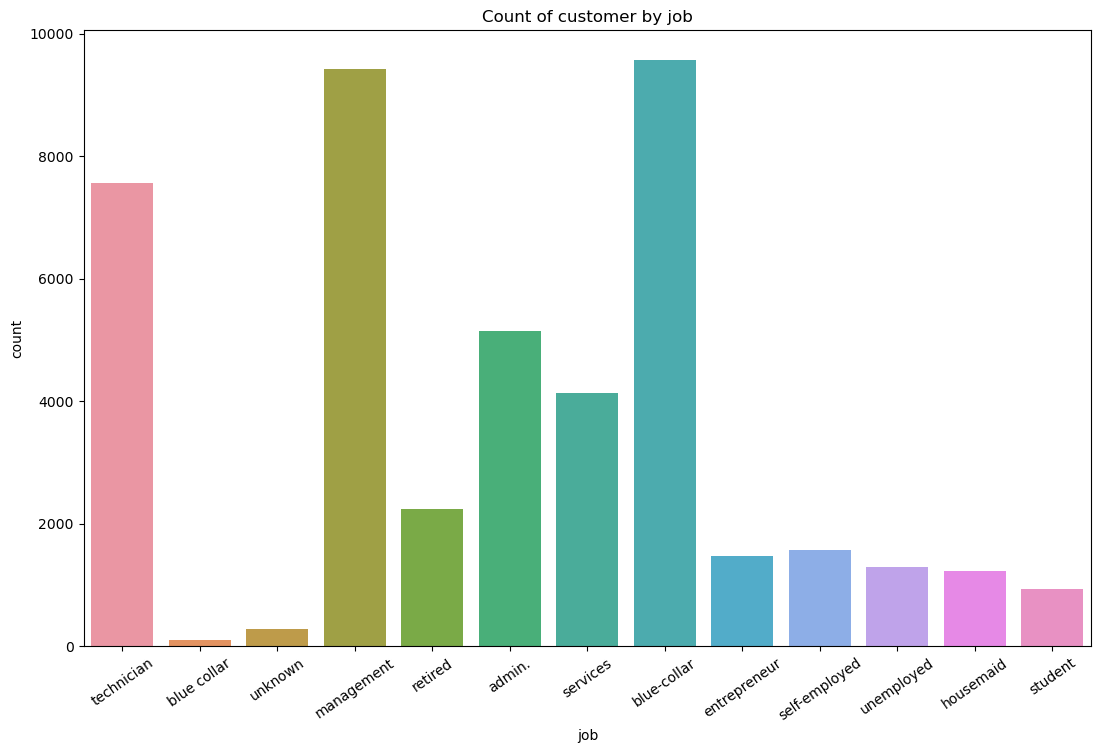

In [36]:
plt.figure(figsize=(13,8))
sns.countplot(x='job',data=merged_df)
plt.title('Count of customer by job')
plt.xlabel('job')
plt.ylabel('count')
plt.xticks(rotation=35)
plt.show()
#management and blue collar customer are maximum

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Term Deposit', y='balance', data=merged_df)
plt.title('Box Plot of Balance by Term Deposit Outcome')
plt.xlabel('Term Deposit Outcome')
plt.ylabel('Balance')
plt.show()


In [41]:
import pandas as pd

# Assuming merged_df is your DataFrame and 'balance' is the column to be converted
merged_df['balance'] = pd.to_numeric(merged_df['balance'], errors='coerce')


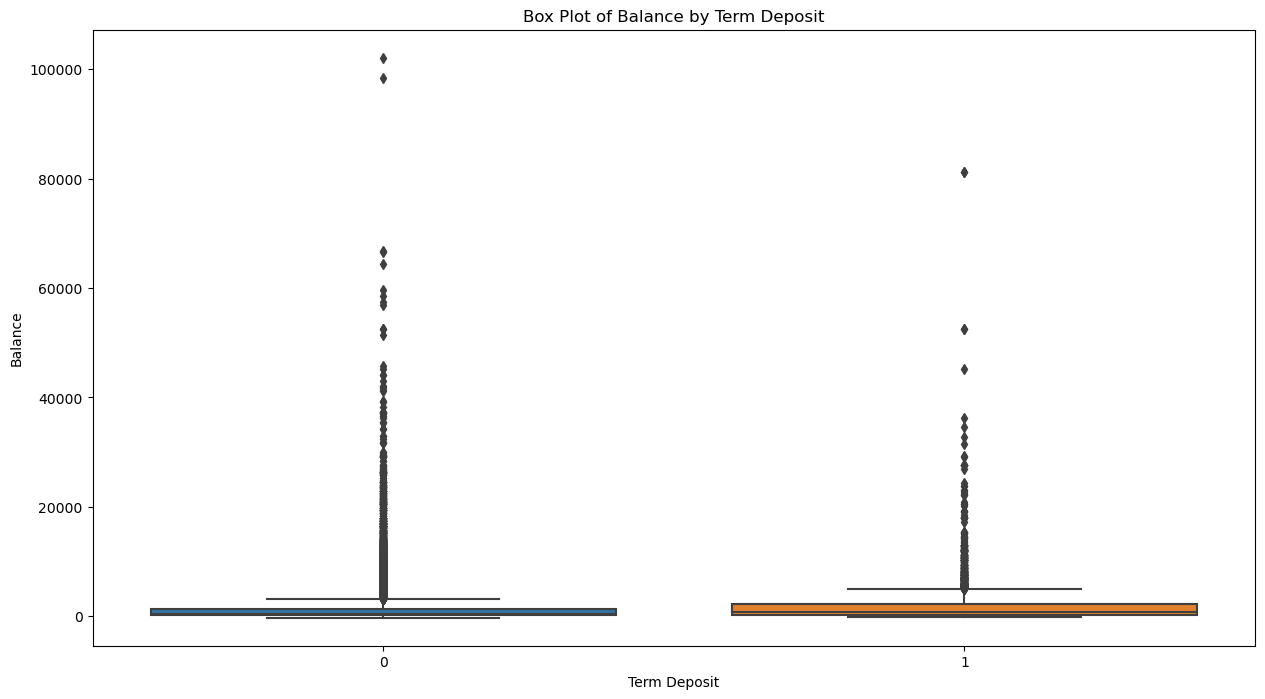

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Term Deposit', y='balance', data=merged_df)
plt.title('Box Plot of Balance by Term Deposit')
plt.xlabel('Term Deposit')
plt.ylabel('Balance')
plt.show()


From box plot we can see that there are some outlier in the dataset .we need to remove these outliers 

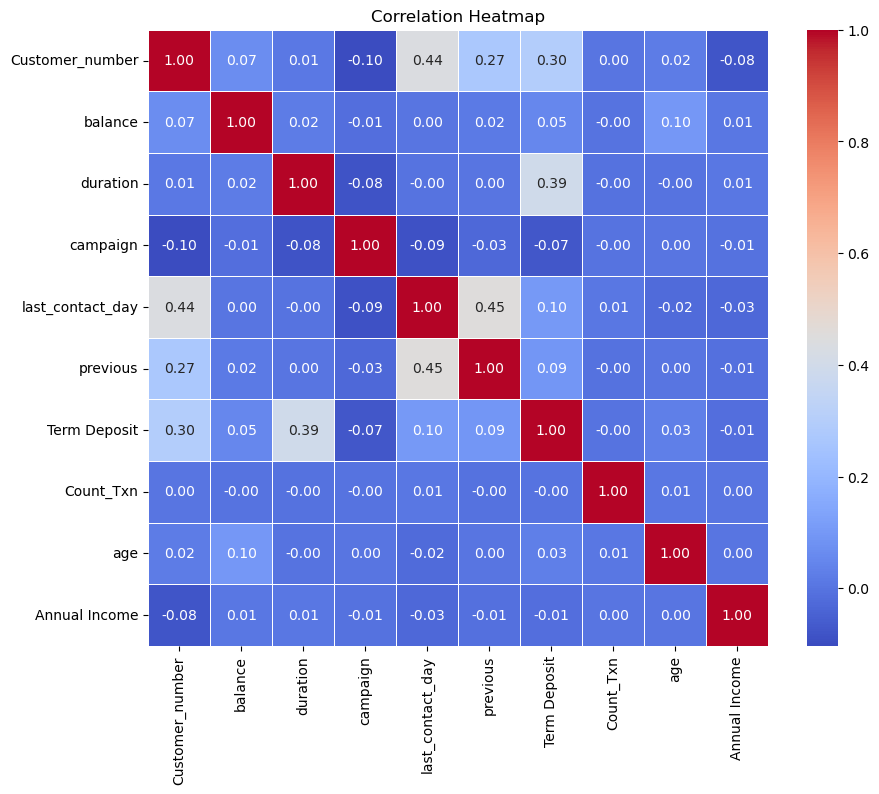

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame containing only the numeric columns
numeric_merged_df = merged_df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_merged_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()


In the above case there is no features that are highly correlated so we can use all these features .

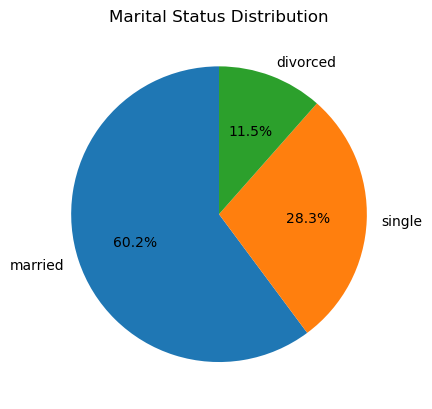

In [54]:
marital_status_counts = merged_df['marital'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Marital Status Distribution')
plt.show()


In [52]:
merged_df.dtypes

Customer_number       int64
Insurance            object
balance             float64
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit          int64
Count_Txn           float64
age                   int64
job                  object
marital              object
education            object
Annual Income       float64
Gender               object
dtype: object

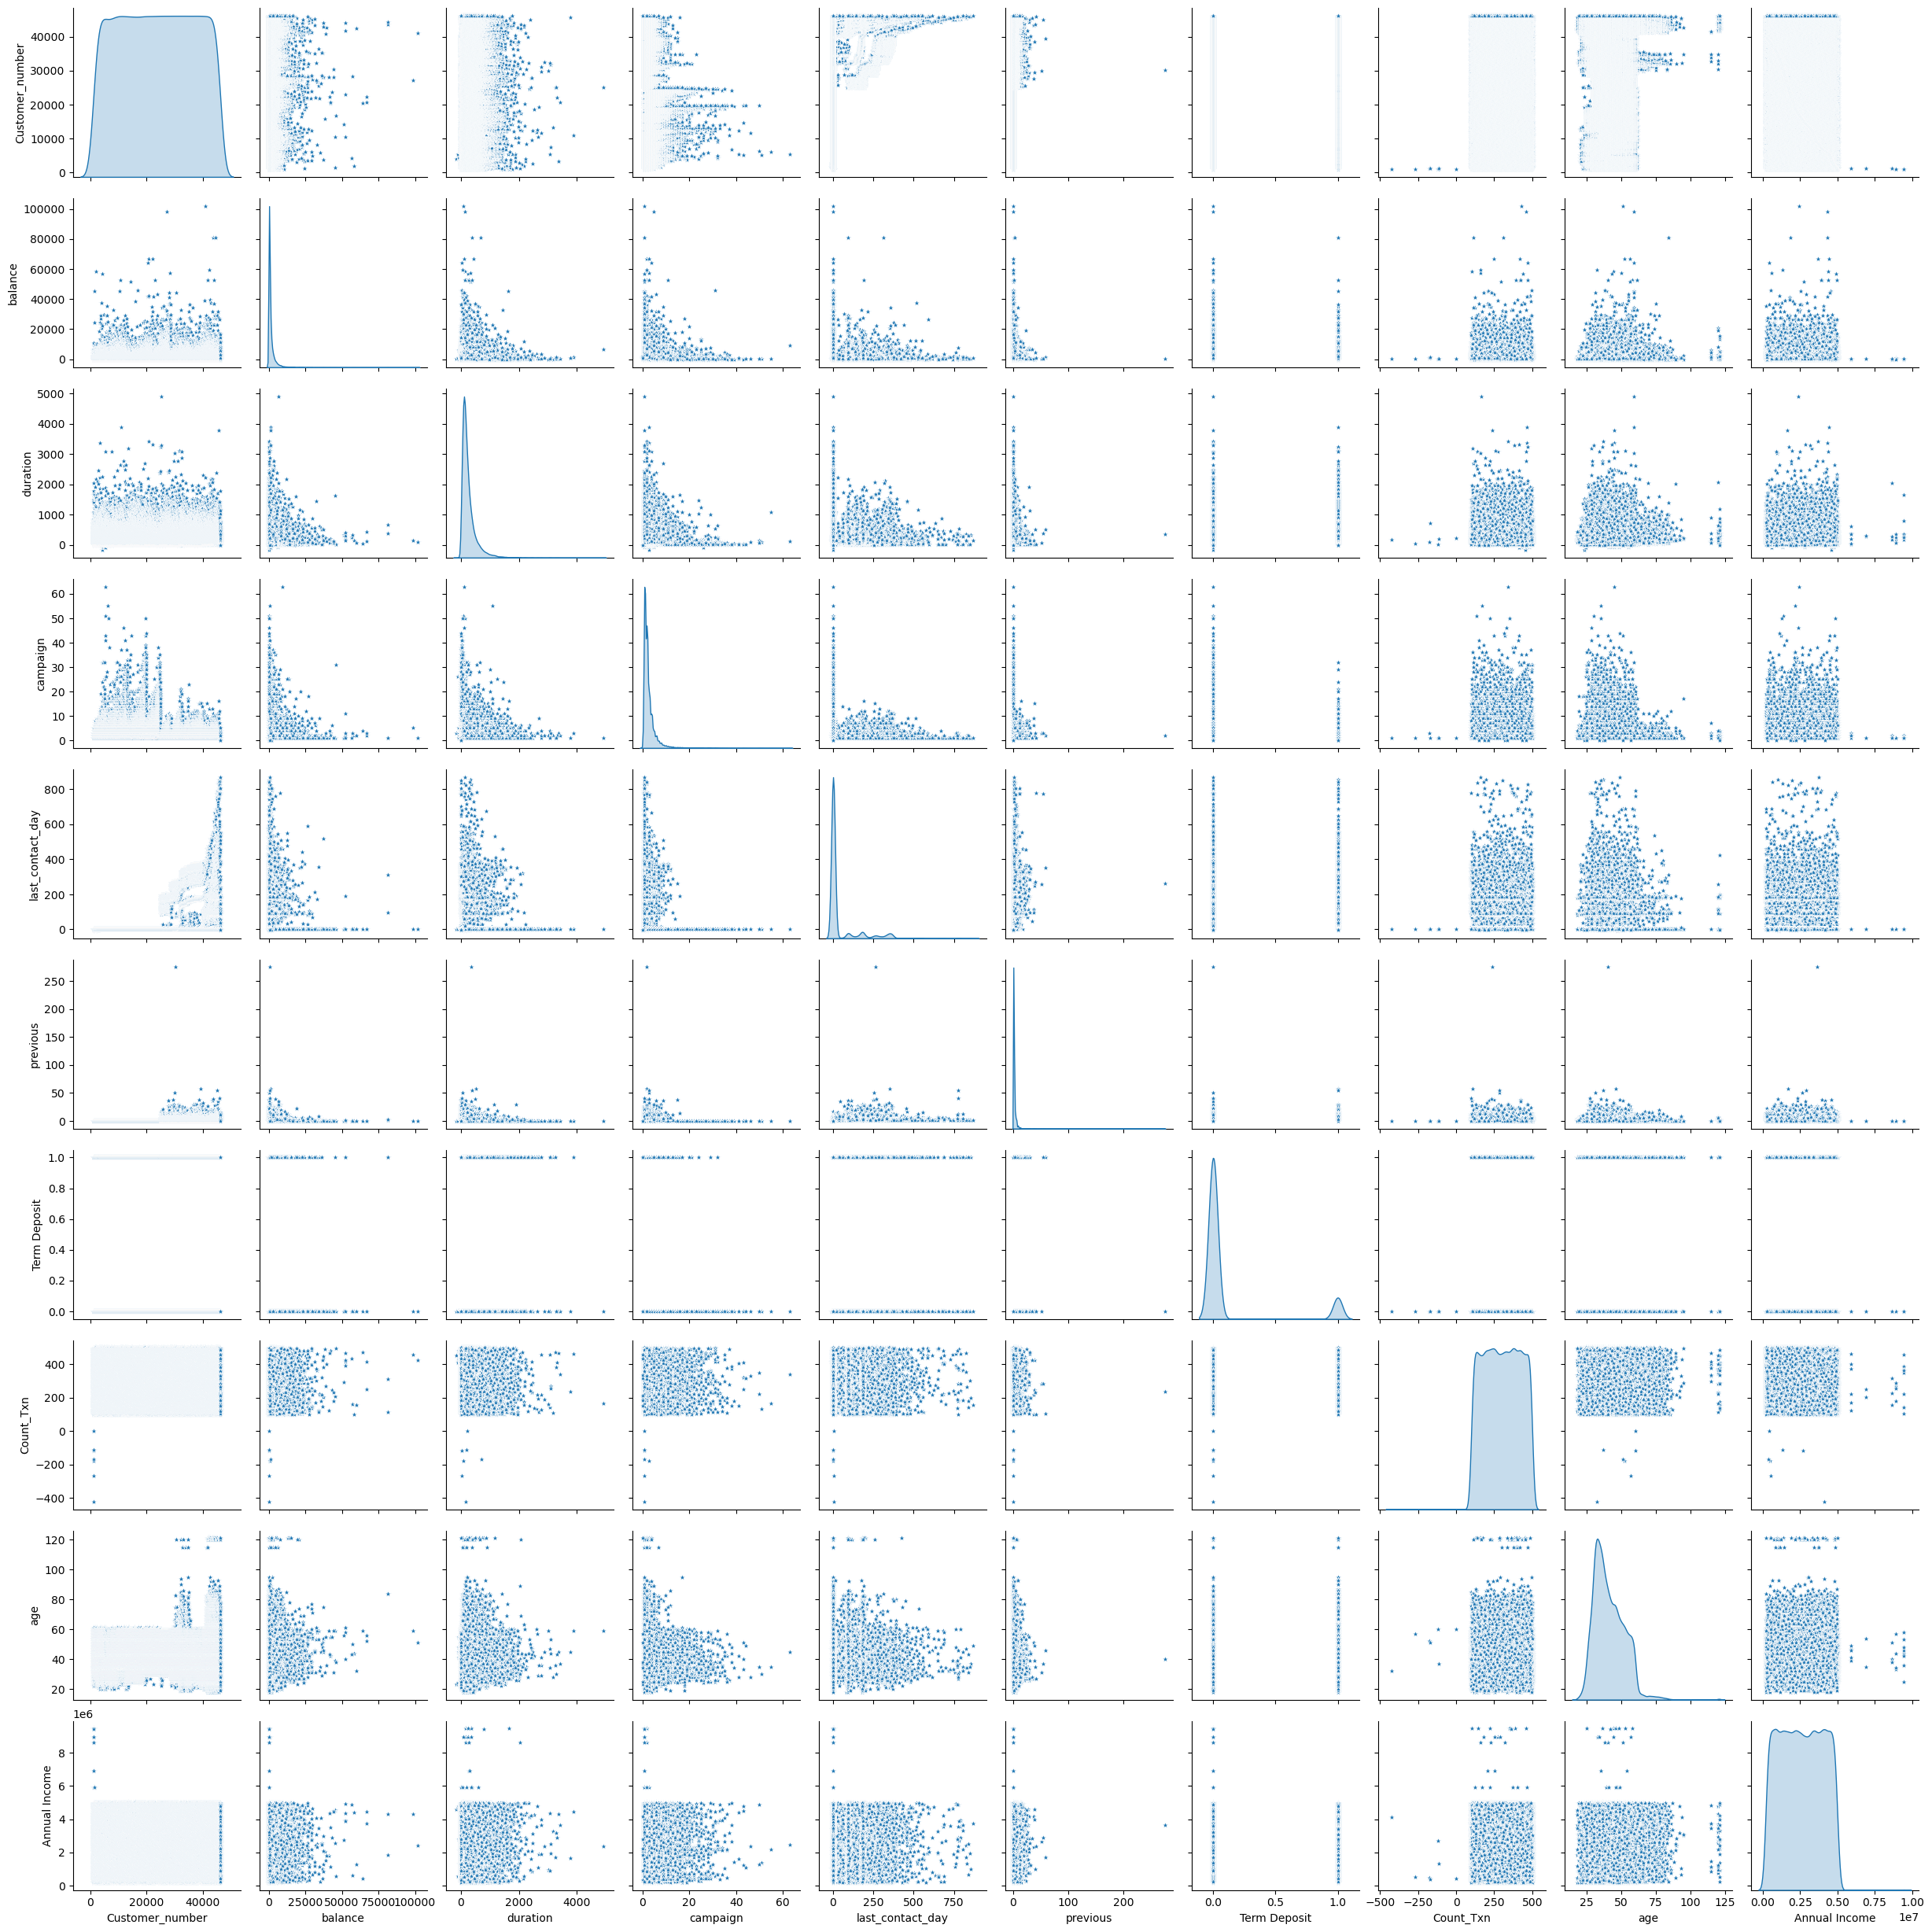

In [56]:
#to see distribution 
sns.pairplot(data=merged_df,diag_kind='kde',markers='*')
plt.show()

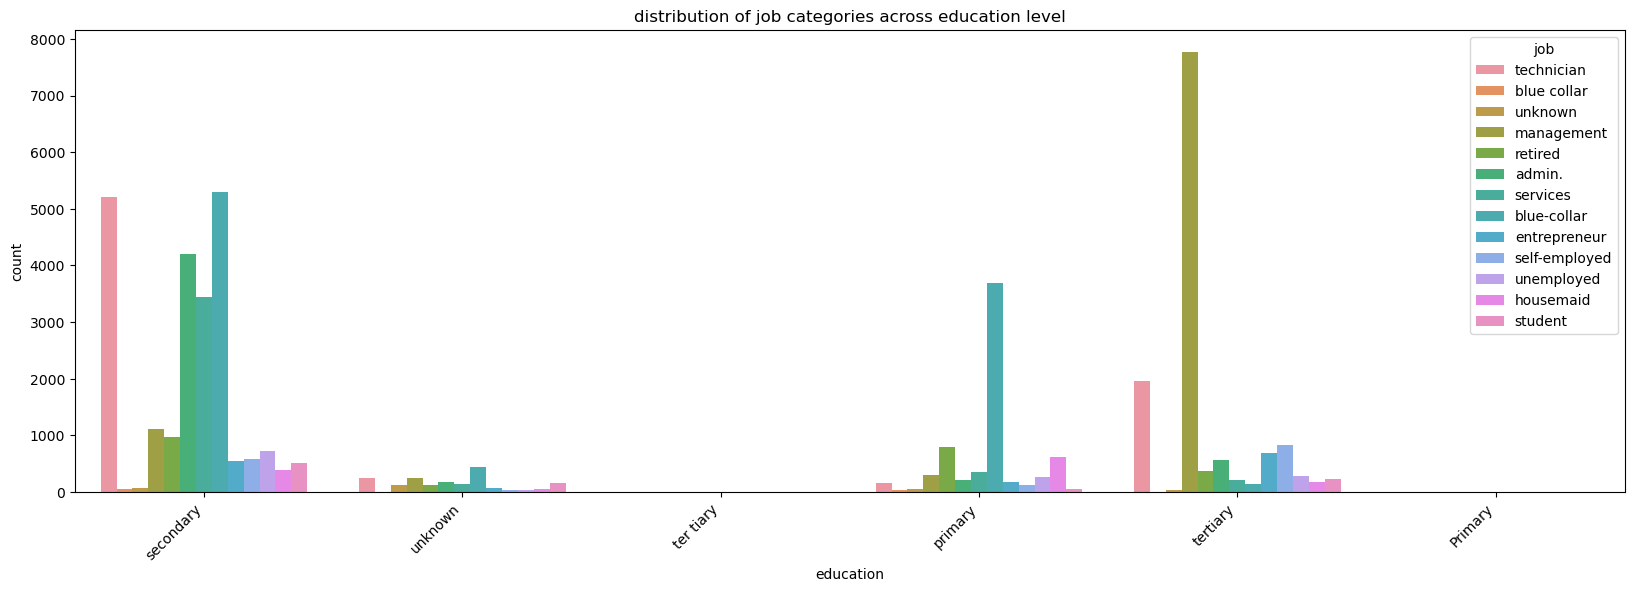

In [60]:
plt.figure(figsize=(20,6))
sns.countplot(data=merged_df,x='education',hue='job')
plt.title('distribution of job categories across education level')
plt.xticks(rotation=45,ha='right')
plt.show()

# Applying PCA

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [62]:
merged_df.columns

Index(['Customer_number', 'Insurance', 'balance', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'last_contact_day', 'previous', 'poutcome',
       'Term Deposit', 'Count_Txn', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender'],
      dtype='object')

In [66]:
label_encoder=LabelEncoder()
categorical_columns=['job','marital','education','loan','contact','poutcome']
for column in categorical_columns:
    merged_df[column]=label_encoder.fit_transform(merged_df[column])

In [71]:
# Assuming 'df' is your DataFrame
for col in merged_df.columns:
    unique_values = merged_df[col].unique()
    if len(unique_values) < 10:  # Adjust the threshold as needed
        print(f"Column '{col}' might be categorical:")
        print(unique_values)


Column 'Insurance' might be categorical:
['no' 'yes']
Column 'housing' might be categorical:
['yes' 'no']
Column 'loan' might be categorical:
[0 1]
Column 'contact' might be categorical:
[5 0 3 4 1 2]
Column 'poutcome' might be categorical:
[6 4 1 0 2 3 5]
Column 'Term Deposit' might be categorical:
[0 1]
Column 'marital' might be categorical:
[2 1 0]
Column 'education' might be categorical:
[2 5 3 1 4 0]
Column 'Gender' might be categorical:
['M' 'F']


In [72]:
features=merged_df.iloc[:,:-1]
features # total 18 columns are there 

,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income
0,1002,no,29.0,yes,0,5,151.0,1,2,0,6,0,326.0,44,10,2,2,1452858.0
1,1004,no,1506.0,yes,0,5,92.0,1,2,0,6,0,113.0,47,1,1,5,3207754.0
2,1005,no,1.0,no,0,5,198.0,1,2,0,6,0,342.0,33,12,2,5,2562322.0
3,1006,no,231.0,yes,0,5,139.0,1,2,0,6,0,490.0,35,5,1,3,3960603.0
4,1007,no,447.0,yes,1,5,217.0,1,2,0,6,0,411.0,28,5,2,3,2383284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44977,46207,no,825.0,no,0,3,0.0,0,-1,0,6,1,152.0,51,10,1,4,2229818.0
44978,46208,no,1729.0,no,0,3,0.0,0,-1,0,6,1,334.0,121,6,0,1,2783556.0
44979,46209,no,5715.0,no,0,3,1127.0,5,184,3,5,1,381.0,72,6,1,2,443512.0
44980,46210,no,668.0,no,0,4,0.0,0,-1,0,6,0,211.0,57,2,1,2,4193684.0


In [93]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'features' contains only numeric features
numeric_features = merged_df_new.select_dtypes(include=['float64', 'int64'])
categorical_features = merged_df_new.select_dtypes(include=['object'])

# One-hot encode categorical features
categorical_features_encoded = pd.get_dummies(categorical_features)

# Concatenate numeric and encoded categorical features
features_encoded = pd.concat([numeric_features, categorical_features_encoded], axis=1)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)


In [153]:
features_scaled

array([[-1.74076711, -0.46272401, -0.41592479, ...,  0.89559618,
        -0.81494608,  0.81494608],
       [-1.74061356,  0.03024389, -0.64492449, ...,  0.89559618,
         1.22707505, -1.22707505],
       [-1.74053678, -0.47206937, -0.23350131, ..., -1.11657466,
        -0.81494608,  0.81494608],
       ...,
       [ 1.73001761,  1.43505221,  3.3722736 , ..., -1.11657466,
        -0.81494608,  0.81494608],
       [ 1.73009438, -0.24944947, -1.00200877, ..., -1.11657466,
         1.22707505, -1.22707505],
       [ 1.73017116,  0.51920663,  0.39915888, ..., -1.11657466,
        -0.81494608,  0.81494608]])

In [154]:
n_components=2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [155]:
merged_df.isnull().sum()# Assuming 'df' is your DataFrame
merged_df_new = merged_df.dropna()

In [160]:
pca=PCA(n_components=n_components)
principal_components=pca.fit_transform(features_scaled)

In [161]:
principal_components

array([[-1.56326843, -0.22726196],
       [-1.42476951,  0.26114164],
       [ 1.12137428, -0.98563417],
       ...,
       [ 3.61206576,  0.85648329],
       [ 1.73210802, -0.0040397 ],
       [ 1.87682708,  1.3524725 ]])

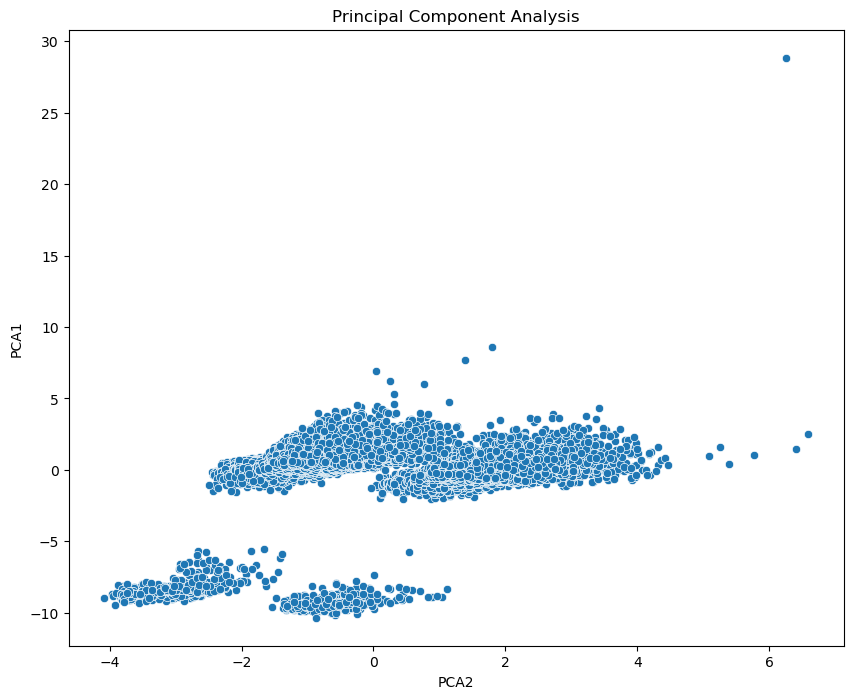

In [105]:
# Assuming 'principal_components' contains the principal components data
pca_df = pd.DataFrame(data=principal_components, columns=['PCA2', 'PCA1'])

# Plot scatterplot without using the 'y' column
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA2', y='PCA1', data=pca_df)
plt.title('Principal Component Analysis')
plt.show()


In [162]:
pca.explained_variance_ratio_

array([0.11899367, 0.10849834])

In [163]:
0.11899367+0.10849834

0.22749201

In [167]:
import numpy as np

# pca_model is your trained PCA model
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratios)



In [168]:
cumulative_variance_ratio

array([0.11899367, 0.22749201])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, merged_df_new['Term Deposit'], test_size=0.2, random_state=42)

In [159]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (35964, 2)
Shape of X_test: (8991, 2)
Shape of y_train: (35964,)
Shape of y_test: (8991,)


In [129]:
from imblearn.over_sampling import SMOTE

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the resampled data


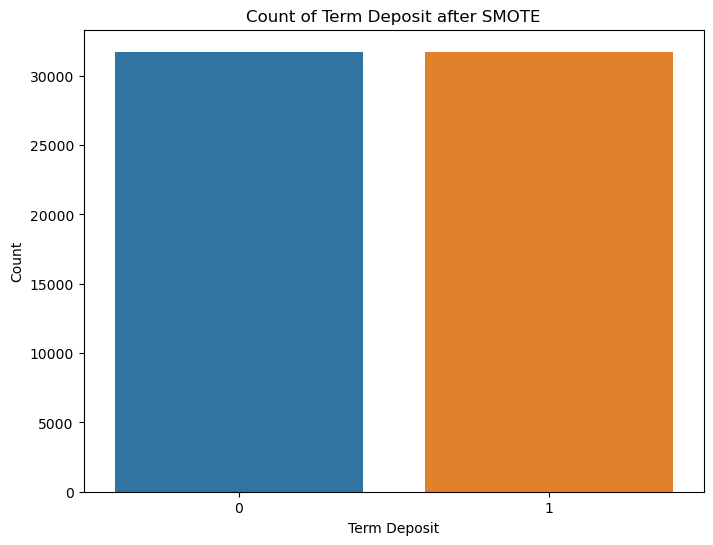

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_train_resampled contains the resampled target labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Count of Term Deposit after SMOTE')
plt.xlabel('Term Deposit')
plt.ylabel('Count')
plt.show()

# random forest 

In [170]:
#before smote 
model_rfc = RandomForestClassifier(n_estimators=150, max_features='auto', max_depth=4, criterion='entropy')

model_rfc.fit(X_train,y_train)
model_rfc.score(X_test,y_test)

0.9346012679346013

In [139]:
#after smote 
model_rfc = RandomForestClassifier(n_estimators=150, max_features='auto', max_depth=4, criterion='entropy')

model_rfc.fit(X_train_resampled, y_train_resampled)
model_rfc.score(X_test,y_test)

0.9162495829162496

In [140]:
#before smote 
from sklearn.metrics import precision_score, recall_score

# Make predictions on the resampled training data
y_pred_train = model_rfc.predict(X_train)

# Calculate precision
precision_train = precision_score(y_train, y_pred_train)
print("Precision on resampled training data:", precision_train)

# Calculate recall
recall_train = recall_score(y_train, y_pred_train)
print("Recall on resampled training data:", recall_train)


Precision on resampled training data: 0.6046807833147588
Recall on resampled training data: 0.8974480151228733


In [141]:
#after smote 
from sklearn.metrics import precision_score, recall_score

# Make predictions on the resampled training data
y_pred_train = model_rfc.predict(X_train_resampled)

# Calculate precision
precision_train = precision_score(y_train_resampled, y_pred_train)
print("Precision on resampled training data:", precision_train)

# Calculate recall
recall_train = recall_score(y_train_resampled, y_pred_train)
print("Recall on resampled training data:", recall_train)


Precision on resampled training data: 0.9199858210879093
Recall on resampled training data: 0.8996911634942645


# decision tree c

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Decision Tree Classifier object
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_dt.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9282615949282615
Precision: 0.6810265811182401
Recall: 0.7144230769230769
F1 Score: 0.6973251994368841
Confusion Matrix:
[[7603  348]
 [ 297  743]]


In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Decision Tree Classifier object
model_dt_resampled = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled training data
model_dt_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_resampled = model_dt_resampled.predict(X_test)

# Calculate evaluation metrics
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)

# Print evaluation metrics
print("Accuracy on resampled data:", accuracy_resampled)
print("Precision on resampled data:", precision_resampled)
print("Recall on resampled data:", recall_resampled)
print("F1 Score on resampled data:", f1_resampled)
print("Confusion Matrix on resampled data:")
print(conf_matrix_resampled)


Accuracy on resampled data: 0.9086864642420198
Precision on resampled data: 0.5755693581780539
Recall on resampled data: 0.801923076923077
F1 Score on resampled data: 0.670148654077943
Confusion Matrix on resampled data:
[[7336  615]
 [ 206  834]]
